In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

c:\Users\Hyeonseok\anaconda3\envs\torch_study\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [4]:
mnist.target[0]

'5'

In [11]:
mnist.target = mnist.target.astype(np.int8)
print(type(mnist.target))


<class 'numpy.ndarray'>


In [12]:
x = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [13]:
x[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
type(x)

numpy.ndarray

In [14]:
y[0]

5

이 이미지 데이터의 레이블은 5이다


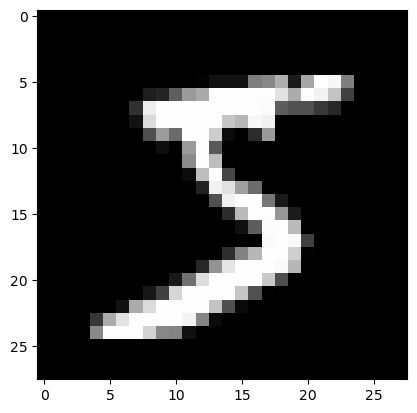

In [15]:
plt.imshow(x[0].reshape(28, 28), cmap='gray')
print(f"이 이미지 데이터의 레이블은 {y[0]:.0f}이다")

In [16]:
# 훈련 데이터와 테스트 데이터 분리
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7, random_state=0)

x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [22]:
# 다층 퍼셉트톤 모델 정의
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [23]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [24]:
def train(epoch):
    model.train() # 신경망을 학습 모드로 전환
    
    # 데이터로더에서 미니배치를 하나씩 꺼내 학습 수행
    for data, targets in loader_train:
        
        pred = model(data)
        cost = loss_fn(pred, targets)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
    print(f'epoch {epoch}: 완료\n')

In [39]:
def test():
    model.eval() # 신경망을 테스트 모드로 전환
    correct = 0
    
    # 데이터로더에서 미니배치를 하나씩 꺼내 테스트 수행
    with torch.no_grad():
        for data, targets in loader_test:
            
            pred = model(data)
            _, predicted = torch.max(pred.data, 1) # 확률이 가장 높은 레이블 선택
            correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정답과 일치한 경우 정답 카운트 증가
            
    
    # 정확도 출력
    data_num = len(loader_test.dataset)
    print(f'\n테스트 데이터 예측 정확도: {correct}/{data_num} ({100. * correct / data_num : .0f}%)\n')
            

In [40]:
test()


테스트 데이터 예측 정확도: 9570/10000 ( 96%)



In [27]:
for epoch in range(3):
    train(epoch)
    
test()

epoch 0: 완료

epoch 1: 완료

epoch 2: 완료


테스트 데이터 예측 정확도: 9570/10000 ( 96%)



tensor([-15.6979,  -0.7321,   4.4861,   2.3658, -12.6247,  -5.5173, -18.6482,
         13.6163,  -2.6814,   1.2888], grad_fn=<AddBackward0>)
예측 결과 : 7
이 이미지 데이터의 정답 레이블은 7


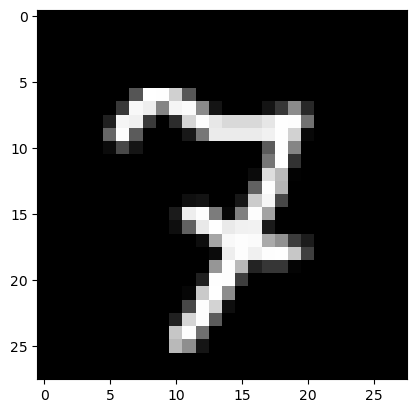

In [34]:
index = 100

model.eval()
data = x_test[index]
pred = model(data)
print(pred)
_, predicted = torch.max(pred.data, 0)

print(f'예측 결과 : {predicted}')

x_test_show = (x_test[index].numpy())
plt.imshow(x_test_show.reshape(28,28), cmap='gray')
print(f'이 이미지 데이터의 정답 레이블은 {y_test[index]:.0f}')